In [157]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [69]:
untappd = pd.read_csv(r'data\beer_checkin.csv')

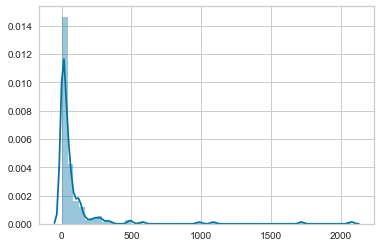

In [70]:
sns.distplot(untappd.estilo_cerveja.value_counts().values)

In [110]:
untappd.estilo_cerveja.value_counts().nlargest(20)

IPA - American                         2077
IPA - New England                      1718
IPA - Imperial / Double                1088
IPA - Imperial / Double New England     987
IPA - Session / India Session Ale       580
Pale Ale - American                     497
Stout - Russian Imperial                484
Sour - Other                            349
Sour - Fruited                          325
Stout - Imperial / Double               284
Sour - Berliner Weisse                  282
Pilsner - Other                         276
Stout - Pastry                          252
Witbier                                 241
Hefeweizen                              235
Lager - Pale                            214
Farmhouse Ale - Saison                  197
IPA - English                           173
Stout - American Imperial / Double      166
Pale Ale - New England                  152
Name: estilo_cerveja, dtype: int64

In [71]:
top20 = untappd.estilo_cerveja.value_counts().nlargest(20).index

In [72]:
untappd_dum = pd.get_dummies(untappd.estilo_cerveja.where(untappd.estilo_cerveja.isin(top20),other='other'))

In [73]:
untappd.drop(columns=['Unnamed: 0', 'check_id'],inplace=True)

In [74]:
untappd_cc = pd.concat([untappd,untappd_dum],axis=1)

In [75]:
untappd_cc.drop(columns=['estilo_cerveja','data_checkin','user_id','cerveja','cervejaria','estilo_cerveja'],inplace=True)

In [114]:
untappd_cc.drop(columns=['id_cerveja'], inplace=True)

In [ ]:
scaler = StandardScaler()
untappd_ss = scaler.fit_transform(untappd_cc)

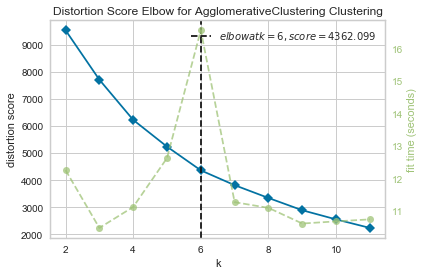

In [115]:
model = AgglomerativeClustering()
#pca = PCA(n_components=2)
#untappd_pca = pca.fit_transform(untappd_dum)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(untappd_dum)
visualizer.show()

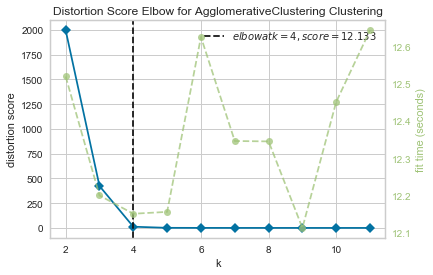

In [117]:
model = AgglomerativeClustering()
pca = PCA(n_components=2)
untappd_pca = pca.fit_transform(untappd_dum)
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(untappd_pca)
visualizer.show()

C:\Users\lenon\Anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\lenon\Anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


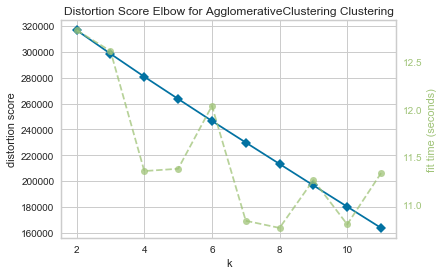

In [165]:
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(untappd_ss)
visualizer.show()

In [166]:
kmeans = KMeans(n_clusters=6)
labels = kmeans.fit(untappd_ss)
untappd['label'] = labels.labels_

In [167]:
untappd.label.value_counts()

1    10015
4     2077
2     1718
5     1088
0      987
3      252
Name: label, dtype: int64

In [168]:
untappd[untappd.label == 0].estilo_cerveja.value_counts()

IPA - Imperial / Double New England    987
Name: estilo_cerveja, dtype: int64

In [169]:
untappd[untappd.label == 1].estilo_cerveja.value_counts()

IPA - Session / India Session Ale    580
Pale Ale - American                  497
Stout - Russian Imperial             484
Sour - Other                         349
Sour - Fruited                       325
                                    ... 
Kentucky Common                        1
Mead - Melomel                         1
Pale Ale - Milkshake                   1
Steinbier                              1
Kombucha                               1
Name: estilo_cerveja, Length: 176, dtype: int64

In [170]:
untappd[untappd.label == 2].estilo_cerveja.value_counts()

IPA - New England    1718
Name: estilo_cerveja, dtype: int64

In [171]:
untappd[untappd.label == 3].estilo_cerveja.value_counts()

Stout - Pastry    252
Name: estilo_cerveja, dtype: int64

In [172]:
untappd[untappd.label == 4].estilo_cerveja.value_counts()

IPA - American    2077
Name: estilo_cerveja, dtype: int64

In [173]:
untappd[untappd.label == 5].estilo_cerveja.value_counts()

IPA - Imperial / Double    1088
Name: estilo_cerveja, dtype: int64

In [162]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit(untappd_ss)
['label_dbscan'] = dbscan_labels.labels_

In [163]:
untappd.label_dbscan.value_counts()

1     5560
2     2077
0     1718
9     1088
3      987
6      580
13     497
5      484
18     349
7      325
14     284
11     282
15     276
4      252
10     241
19     235
16     214
8      197
12     173
17     166
20     152
Name: label_dbscan, dtype: int64

In [150]:
untappd[untappd.label_dbscan == 5].estilo_cerveja.value_counts()

Stout - Russian Imperial    484
Name: estilo_cerveja, dtype: int64